In [49]:
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding = "ISO-8859-1")

In [50]:
print(star_wars.head(10))

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             
5  3.292731e+09                                                Yes             
6  3.292719e+09                                                Yes             
7  3.292685e+09                                                Yes             
8  3.292664e+09                                                Yes             
9  3.292654e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           

In [51]:
print(star_wars.columns)
print(star_wars.shape)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [52]:
star_wars["RespondentID"] = pd.notnull("RespondentID")

In [53]:
print(star_wars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1187 non-null bool
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                          

In [54]:
# Convert the Yes/No questions into Booleans using mapping
yes_no = {
    "Yes": True,
    "No": False
}
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"])

star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"])


0         NaN
1        True
2       False
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12      False
13       True
14       True
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26      False
27       True
28       True
29       True
        ...  
1157     True
1158    False
1159     True
1160    False
1161     True
1162     True
1163     True
1164     True
1165     True
1166     True
1167     True
1168     True
1169    False
1170     True
1171    False
1172     True
1173     True
1174     True
1175     True
1176     True
1177     True
1178     True
1179    False
1180     True
1181     True
1182     True
1183     True
1184    False
1185     True
1186     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: object
0         NaN
1        True
2         NaN
3       False
4       

In [55]:
# Map the seen/not seen checkboxes to booleans
column_list = star_wars.columns[3:9]
for col in column_list:
    seen_map = {
        "Star Wars: Episode I  The Phantom Menace": True,
        "Star Wars: Episode II  Attack of the Clones": True,
        "Star Wars: Episode III  Revenge of the Sith": True,
        "Star Wars: Episode IV  A New Hope": True,
        "Star Wars: Episode V The Empire Strikes Back": True,
        "Star Wars: Episode VI Return of the Jedi": True,
        "NaN": False
    }
    star_wars[col] = star_wars[col].map(seen_map)

In [56]:
print(star_wars.head())

  RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0         True                                                NaN             
1         True                                               True             
2         True                                              False             
3         True                                               True             
4         True                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                NaN                      
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      

  Which of the following Star Wars films have you seen? Please select all 

In [57]:
# rename the columns to something more intuitive

star_wars = star_wars.rename(columns = {
    "Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1",
    "Unnamed: 4" : "seen_2",
    "Unnamed: 5" : "seen_3",
    "Unnamed: 6" : "seen_4",
    "Unnamed: 7" : "seen_5",
    "Unnamed: 8" : "seen_6"
})

In [58]:
print(star_wars.head())

  RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0         True                                                NaN             
1         True                                               True             
2         True                                              False             
3         True                                               True             
4         True                                               True             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                                NaN                      
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      

  seen_1 seen_2 seen_3 seen_4 seen_5 seen_6  \
0   True   True   True   Tr

In [59]:
# convert the ranking survey questions into floats

# the first row of the ranking the films in preference is the film name
star_wars = star_wars[1:]

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

star_wars = star_wars.rename(columns = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." : "ranking_1",
    "Unnamed: 10" : "ranking_2",
    "Unnamed: 11" : "ranking_3",
    "Unnamed: 12" : "ranking_4",
    "Unnamed: 13" : "ranking_5",
    "Unnamed: 14" : "ranking_6"
})

In [60]:
print(star_wars.tail())

     RespondentID  \
1182         True   
1183         True   
1184         True   
1185         True   
1186         True   

     Have you seen any of the 6 films in the Star Wars franchise?  \
1182                                               True             
1183                                               True             
1184                                              False             
1185                                               True             
1186                                               True             

     Do you consider yourself to be a fan of the Star Wars film franchise?  \
1182                                               True                      
1183                                               True                      
1184                                                NaN                      
1185                                               True                      
1186                                              False             

<Container object of 6 artists>

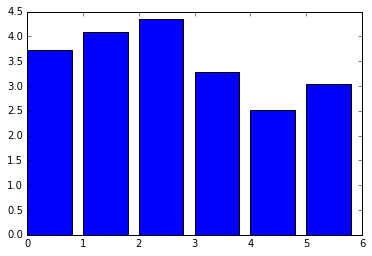

In [61]:
# finding mean movie rankings
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(range(6), star_wars[star_wars.columns[9:15]].mean())

## As the 5th movie (Empire Strikes Back) has the lowest average rating, it appears respondents liked that movie best out of the first 6.  The 3rd movie appears to be least liked.  In general, the original trilogy appears to be more liked than the prequel trilogy

<Container object of 6 artists>

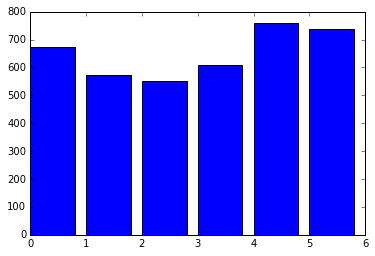

In [62]:
fig, ax = plt.subplots()
ax.bar(range(6), star_wars[star_wars.columns[3:9]].sum())

## More people have seen the 5th and 6th movies than the other 4.  The 3rd movie appears to be least watched, and the original trilogy appears to be more watched than the prequel trilogy.  This correlates well with the average ratings (as more people watched the movies that were rated better)

552
284


<Container object of 6 artists>

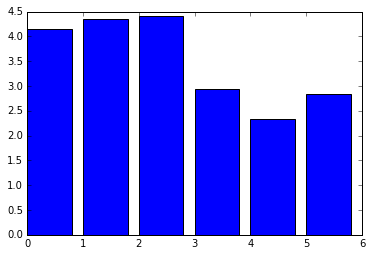

In [71]:
# plotting mean scores for star wars fans
star_wars_fans = star_wars.loc[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_star_wars_fans = star_wars.loc[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
print(star_wars_fans.shape[0])
print(not_star_wars_fans.shape[0])

fig, ax = plt.subplots()
ax.bar(range(6), star_wars_fans[star_wars_fans.columns[9:15]].mean())

<Container object of 6 artists>

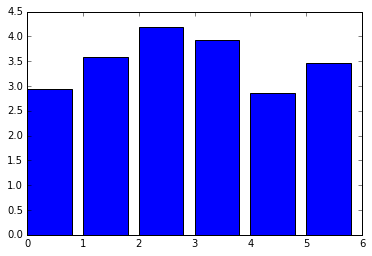

In [68]:
# plotting mean scores for non star wars fans
fig, ax = plt.subplots()
ax.bar(range(6), not_star_wars_fans[not_star_wars_fans.columns[9:15]].mean())

<Container object of 6 artists>

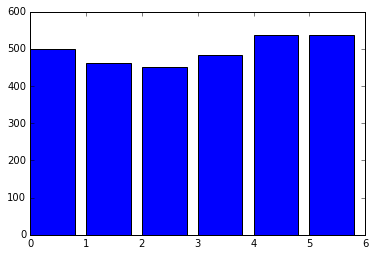

In [69]:
# plotting number of films seen by fans
fig, ax = plt.subplots()
ax.bar(range(6), star_wars_fans[star_wars_fans.columns[3:9]].sum())

<Container object of 6 artists>

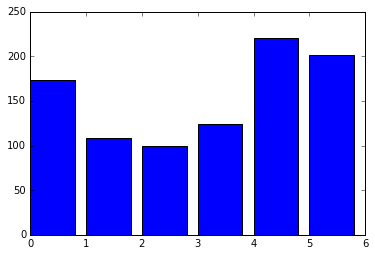

In [70]:
# plotting number of films seen by non-fans
fig, ax = plt.subplots()
ax.bar(range(6), not_star_wars_fans[not_star_wars_fans.columns[3:9]].sum())

## Star wars fans on the whole preferred the original trilogy significantly over the prequel trilogy, while non-fans did not have as strong of a preference.  Of star wars fans approximately 80% (~450/552) had seen all 6 movies, while of non star wars fans less than 30% (~100/284) had seen all 6 movies.

427
641


<Container object of 6 artists>

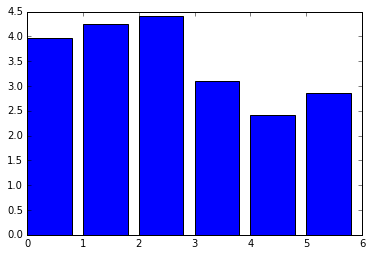

In [74]:
# plotting mean scores of star trek fans

star_trek_fans = star_wars.loc[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
not_star_trek_fans = star_wars.loc[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

print(star_trek_fans.shape[0])
print(not_star_trek_fans.shape[0])

fig, ax = plt.subplots()
ax.bar(range(6), star_trek_fans[star_trek_fans.columns[9:15]].mean())

<Container object of 6 artists>

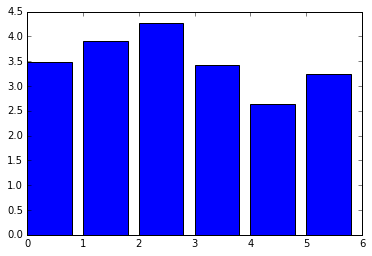

In [75]:
# plotting mean scores of non star trek fans
fig, ax = plt.subplots()
ax.bar(range(6), not_star_trek_fans[not_star_trek_fans.columns[9:15]].mean())

<Container object of 6 artists>

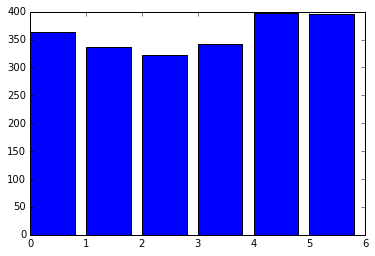

In [76]:
fig, ax = plt.subplots()
ax.bar(range(6), star_trek_fans[star_trek_fans.columns[3:9]].sum())

<Container object of 6 artists>

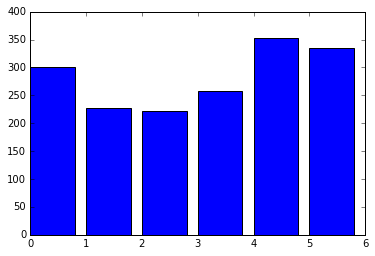

In [77]:
fig, ax = plt.subplots()
ax.bar(range(6), not_star_trek_fans[not_star_trek_fans.columns[3:9]].sum())

In [91]:
both_fans = star_wars_fans.loc[star_wars_fans["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
print(both_fans.shape[0])
neither_fans = not_star_wars_fans.loc[not_star_wars_fans["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
print(neither_fans.shape[0])
star_wars_only_fan = star_wars_fans.loc[star_wars_fans["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]
star_trek_only_fan = star_trek_fans.loc[star_trek_fans["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]
print(star_wars_only_fan.shape[0])
print(star_trek_only_fan.shape[0])
print(star_wars.shape[0])
print(star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"].value_counts())

370
238
175
45
1186
No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64


## It appears Star Trek fans are of a similar opinion to Star Wars fans regarding the original vs. prequel trilogies.  Additionally, of the 1186 respondents in the dataset, 370 (31%) are fans of both franchises, 238 (20%) are fans of neither franchise, 175 (15%) are fans of Star Wars only, and 45 (4%) are fans of Star Trek only.  As many people did not respond to the fan questions we do not have a complete dataset, however.  

In [94]:
print(star_wars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                      1186 non-null bool
Have you seen any of the 6 films in the Star Wars franchise?                                                      1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                             836 non-null object
seen_1                                                                                                            673 non-null object
seen_2                                                                                                            571 non-null object
seen_3                                                                                                            550 non-null object
seen_4                                                                                   